# Case Study

## Part 1

In [1]:
import pandas as pd

1. Load in the data in `companies.csv` and `prices.csv` (in the data folder).
2. Write a function `is_incorporated` that checks whether an input string, `name`, contains the substring "inc" or "Inc". Its definition should look like this:
```python
def is_incorporated(name):
```
(Yes, all these companies are *technically* incorporated, but bear with us for the exercise.)
3. Test this function to be sure it works. Try passing in some strings that contain the substring and some that don't. Test it on data from the companies DataFrame.
4. Write a `for` loop to iterate through the elements in the Name column of the companies data, applying `is_incorporated` to each element and printing the result.
5. Now rewrite the code for #4 using the `Series.apply` method -- apply the function to the Series and print the resulting Series.
6. *Similar, but less guided.* Create a new column, name_length, whose value is:
    - `"long"` if the company name is over 12 characters
    - `"medium"` if the company name is 8-11 characters
    - `"short"` if the company name is 7 or fewer characters.
7. Write a function `make_colname_string` that takes a DataFrame as an argument and returns a string that contains all the DataFrame's columns' names, comma separated. For example, running `make_colname_string` on our companies data would look like this:<br><br>
```python
make_colname_string(companies)
#> 'Symbol,Name,Sector'
```
<br>*Hint: a for loop will be helpful.* Test it on the prices data. What does it return?
    
### Putting It All Together
Suppose you've discovered a great secret about the stock market: companies with long names (as defined above) are going to double in value after quarter 4 (our most recent data), companies with short names are going to halve in value, and medium-name companies will stay exactly the same. Create a dataset of the form:
| Name | Symbol | Projected |
-------|--------|------------

Where "Projected" is the projected price of the company's stock (2x, 1x, .5x as explained above). Note that you will need to join companies to prices and do some data wrangling operations.

## Part 2

*Modeling*

1. Load in the data in `cars.csv` (in the data folder)

In [2]:
cars = pd.read_csv('../data/cars.csv')

2. Explore the data:
  * How many rows are in the data?
  * What does each row represent?
  * How many columns are in the data?
  * What data type is each column?

In [3]:
print('Shape:', cars.shape)
cars.head()

Shape: (3156, 12)


,car_id,msrp,make,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg
0,1,46135,BMW,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19
1,2,40650,BMW,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19
2,3,36350,BMW,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20
3,4,29450,BMW,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18
4,5,34500,BMW,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18


In [4]:
cars.dtypes

car_id                 int64
msrp                   int64
make                  object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
dtype: object

3. Set up your model specification to predict the MSRP of each car.
  * What column will be your target?
  * Which columns will be your features?

In [5]:
# Drop columns unlikely to be of value.
cars = cars.drop(['car_id'], axis=1)

In [6]:
target_colname = 'msrp'
feature_colnames = [column for column in cars.columns
                    if column != target_colname]
feature_colnames

['make',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'driven_wheels',
 'number_of_doors',
 'vehicle_size',
 'vehicle_style',
 'highway_mpg',
 'city_mpg']

4. Prepare your data.
  * View the target variable's distribution. Remove outliers if necessary.
  * Engineer your features (encode categorical variables, etc.)
  * Split your data into train and test sets.

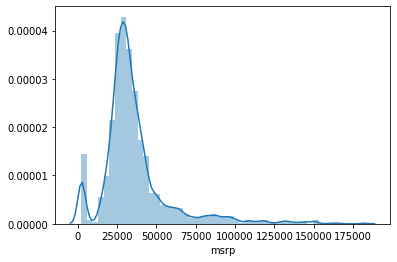

In [7]:
import seaborn as sns
%matplotlib inline
sns.distplot(cars['msrp']);

In [8]:
# Determine an outlier threshold.
outlier_threshold = cars['msrp'].quantile(.99)
outlier_threshold

132481.24999999988

In [9]:
# Filter out outliers.
cars = cars[cars['msrp'] < outlier_threshold]

In [10]:
# Encode categorical variables
prepped_cars = pd.get_dummies(cars)
prepped_cars.head()

,msrp,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,make_BMW,make_Chevrolet,make_Dodge,make_Ford,...,vehicle_style_Convertible,vehicle_style_Convertible SUV,vehicle_style_Coupe,vehicle_style_Crew Cab Pickup,vehicle_style_Extended Cab Pickup,vehicle_style_Passenger Minivan,vehicle_style_Passenger Van,vehicle_style_Regular Cab Pickup,vehicle_style_Sedan,vehicle_style_Wagon
0,46135,335.0,6.0,2.0,26,19,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,40650,300.0,6.0,2.0,28,19,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,36350,300.0,6.0,2.0,28,20,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,29450,230.0,6.0,2.0,28,18,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,34500,230.0,6.0,2.0,28,18,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(prepped_cars, test_size=0.2)
print(train_df.shape)
print(test_df.shape)

(2499, 41)
(625, 41)


5. Train a linear model using `sklearn.linear_model`'s `LinearRegression`.

In [12]:
Xtrain = train_df.drop('msrp', axis=1)
ytrain = train_df['msrp']

Xtest = test_df.drop('msrp', axis=1)
ytest = test_df['msrp']

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [14]:
model.fit(X=Xtrain, y=ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

6. Is this model good?
  * Is it better than any other estimate we have?
  * What's the train RMSE? What's the test RMSE? How do they compare to the standard deviation of the target?
  * Create a predicted vs. actual plot?
  * Which variables have the largest effect size?

In [15]:
# The most naive model we could build would predict the average price for every car. 
avg_price = cars['msrp'].mean()
predicted = [avg_price]*len(ytrain)

In [16]:
# Let's see what the RMSE is of that model.
from sklearn.metrics import mean_squared_error
from math import sqrt
actuals = ytrain
sqrt(mean_squared_error(actuals, predicted))

19529.1566129569

In [17]:
# Now the RMSE of our trained linear model.
actuals = ytrain
predicted = model.predict(Xtrain)
sqrt(mean_squared_error(actuals, predicted))

8325.706689180912

*It's certainly a lot better than just predicting the average price!*

In [18]:
# What's the target standard deviation?
cars['msrp'].std()

19525.67705472818

*Again, our model is a lot better than that.*

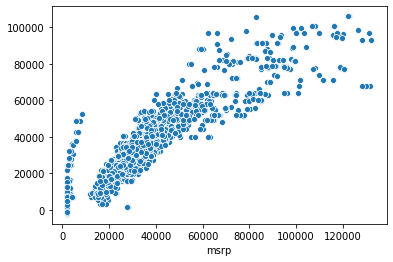

In [19]:
sns.scatterplot(y=predicted, x=actuals);

*It looks like we actually are doing okay!*

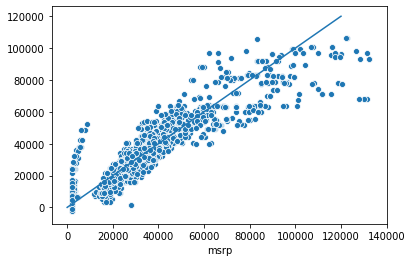

In [20]:
# Overlay a y=x line.
sns.lineplot([0, 120_000], [0, 120_000])
sns.scatterplot(y=predicted, x=actuals);

In [21]:
# Effect size ... just copy this code from the slides.
def get_coefficients(columns, model_object):
    '''Function to sort get the sorted coefficients of a linear model'''
    import operator
    dictionary = dict(zip(columns, model_object.coef_))
    return sorted(dictionary.items(), key = operator.itemgetter(1))

In [22]:
get_coefficients(Xtrain.columns, model)

[('transmission_type_DIRECT_DRIVE', -21063.731193436586),
 ('make_Dodge', -10087.605337427469),
 ('vehicle_style_Coupe', -9124.557662854904),
 ('make_Ford', -9004.194401318597),
 ('vehicle_style_2dr Hatchback', -8801.469241232058),
 ('vehicle_style_Regular Cab Pickup', -7847.443518774831),
 ('make_Nissan', -7541.080331580104),
 ('make_Subaru', -7166.023878574964),
 ('make_Chevrolet', -6772.9916967800045),
 ('make_Mazda', -6064.0875227920405),
 ('number_of_doors', -2280.0023474490326),
 ('vehicle_size_Midsize', -2187.09695228422),
 ('driven_wheels_rear wheel drive', -2083.4223997344125),
 ('vehicle_style_Extended Cab Pickup', -1616.3605667603663),
 ('vehicle_style_Passenger Minivan', -1482.176614135477),
 ('vehicle_style_4dr Hatchback', -1140.6068199806937),
 ('make_Volkswagen', -1021.7203159204429),
 ('driven_wheels_front wheel drive', -810.73573430484),
 ('vehicle_style_Convertible', -792.4263016617382),
 ('engine_cylinders', 108.79573098602911),
 ('engine_hp', 156.09738588740478),
 (


  
*Python Environments*

7. While training and running your model should have been pretty fast, imagine that you are working with orders of magnitude more data -- so you want to train the model overnight, rather than interactively.
  * Export your Jupyter notebook as a `.py` script.
  * Be sure to add `print()` calls so you can see important data.
  * Run your `.py` file from the command line, and verify the results.
6. Think back to Lesson 8, on the data science ecosystem. 
  * Which package sounded most interesting/useful to you? 
  * If you are working on a platform with `conda`, create a new environment called "temporary".
  * Activate the `temporary` environment.
  * Install your package of choice package in `temporary`. 
  * Try to import it in a notebook (remember you'll need to get your conda environment working in Jupyter), and look in the online documentation (just google "package-name docs") to figure out what you can do with this package.